# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Fatimah Adelia Nainggolan
- **Email:** itsfatimahadelia@gmail.com
- **ID Dicoding:** l000xwp055

## Menentukan Pertanyaan Bisnis

- Pada bulan apa peminjaman sepeda paling tinggi terjadi, dan berapa total peminjaman yang tercatat?
- Pada musim apa peminjaman sepeda paling rendah terjadi, dan parameter cuaca apa yang kemungkinan memengaruhi rendahnya peminjaman tersebut?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
# Load data harian dan jam-an
path_day = "data/data_1.csv"
path_hour = "data/data_2.csv"
day = pd.read_csv(path_day)
hour = pd.read_csv(path_hour)

**Insight:**
- Menggunakan dua jenis data: data harian (`data_1.csv`) dan data jam-an (`data_2.csv`).
- Data dibaca dari file CSV menggunakan perintah `pd.read_csv()`, yang merupakan fungsi dari library pandas untuk membuka file spreadsheet.
- File `data_1.csv` berisi informasi peminjaman sepeda tiap hari, sedangkan `data_2.csv` lebih detail karena mencatat tiap jam.
- Data ini akan di analisis untuk melihat tren peminjaman berdasarkan waktu, cuaca, dan kondisi lainnya.

### Assessing Data

In [4]:
print(day.info())
print(hour.info())
print(day.head())
print(hour.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

**Insight:**
- Setelah dicek, datanya lengkap semua, nggak ada missing value. Jadi nggak perlu isi ulang atau buang data.
- Tipe data untuk tiap kolom sudah cocok. Misalnya, kolom jumlah peminjaman (`cnt`) berupa angka, dan kolom tanggal (`dteday`) dalam bentuk teks tanggal.
- Ada beberapa kolom yang isinya berupa kode angka (seperti `season`, `mnth`, `weekday`, dll) yang sebenarnya mewakili kategori, misalnya musim atau hari. 
- Agar lebih mudah dianalisis dan dibaca nanti, kolom-kolom ini akan di ubah ke bentuk kategori (bukan angka biasa).

### Cleaning Data

In [5]:
# Ubah tipe kolom tertentu menjadi kategori
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_columns:
    day[col] = day[col].astype('category')
    hour[col] = hour[col].astype('category')

**Insight:**
- Beberapa kolom seperti `season`, `mnth`, `weekday`, dan lainnya berisi angka yang sebenarnya mewakili kategori (contohnya: 1 untuk musim semi, 2 untuk musim panas, dan seterusnya).
- Mengubah tipe data kolom-kolom menjadi kategori agar nanti lebih mudah dibaca dan divisualisasikan.
- Proses ini dilakukan di dua dataset: harian (`day`) dan jam-an (`hour`).


## Exploratory Data Analysis (EDA)

### Explore Peminjaman Berdasarkan Bulan

<ipython-input-6-829aa105a1c9>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_rentals = day.groupby('mnth')['cnt'].sum().sort_values(ascending=False)


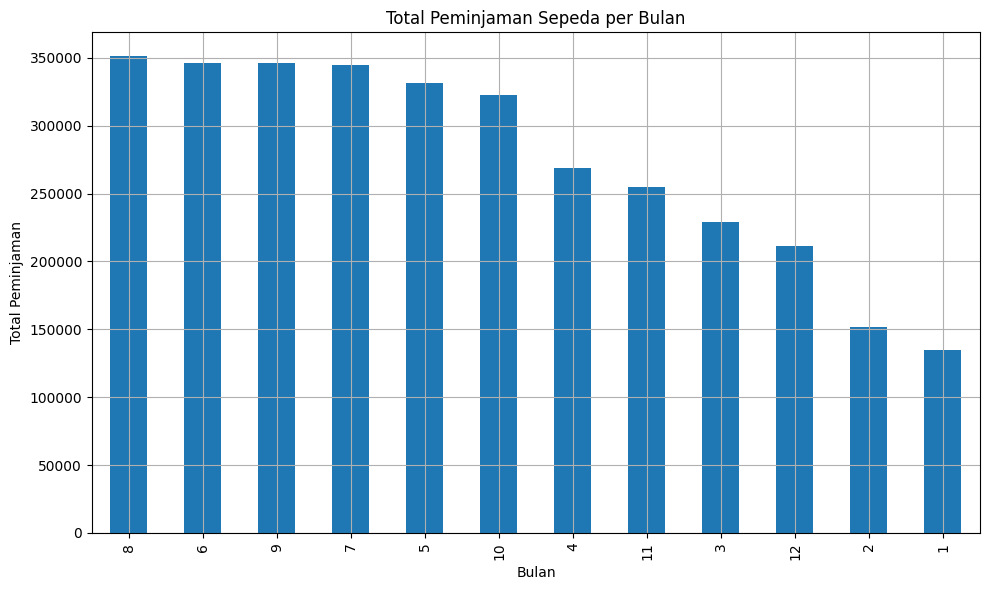

In [6]:
monthly_rentals = day.groupby('mnth')['cnt'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
monthly_rentals.plot(kind='bar')
plt.title('Total Peminjaman Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Peminjaman')
plt.grid(True)
plt.tight_layout()
plt.show()

### Explore Musim Dengan Peminjaman Terendah

<ipython-input-7-5ed45b12881d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_rentals = day.groupby('season')[['cnt', 'temp', 'hum', 'windspeed']].mean()


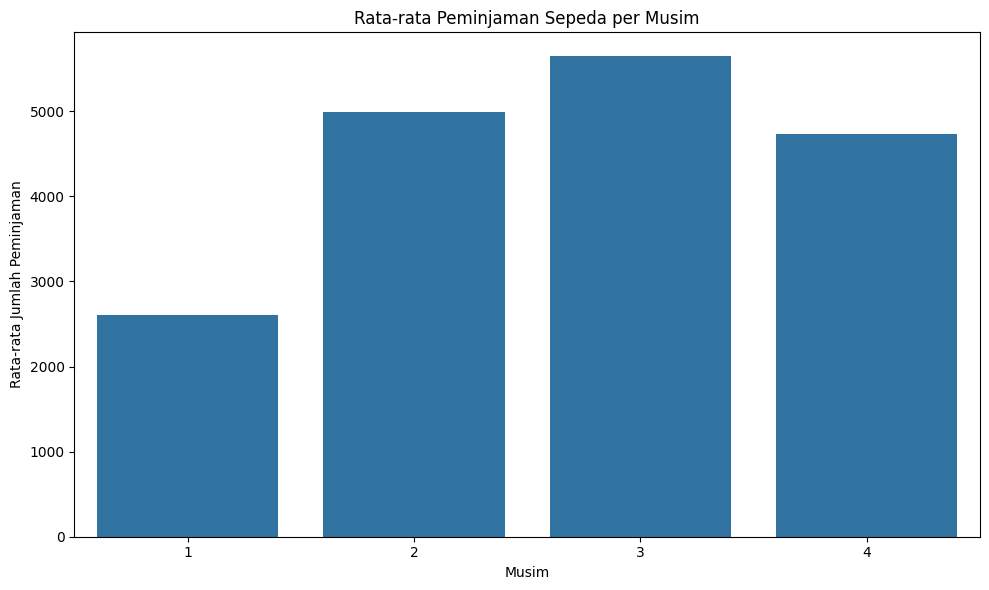

In [7]:
season_rentals = day.groupby('season')[['cnt', 'temp', 'hum', 'windspeed']].mean()

plt.figure(figsize=(10,6))
sns.barplot(x=season_rentals.index, y=season_rentals['cnt'])
plt.title('Rata-rata Peminjaman Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.tight_layout()
plt.show()

**Insight:**
- Peminjaman tertinggi terjadi pada bulan ke-6 (Juni).
- Musim dingin (winter) memiliki jumlah peminjaman terendah.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [8]:
# Peminjaman tertinggi terjadi di bulan apa?

print("Total peminjaman tertinggi terjadi di bulan:", monthly_rentals.idxmax(), "dengan total:", monthly_rentals.max())

Total peminjaman tertinggi terjadi di bulan: 8 dengan total: 351194


### Pertanyaan 2:

In [9]:
# Apa parameter cuaca di musim dengan peminjaman terendah?

print("Rata-rata kondisi cuaca di musim dengan peminjaman terendah:")
print(season_rentals.loc[season_rentals['cnt'].idxmin()])

Rata-rata kondisi cuaca di musim dengan peminjaman terendah:
cnt          2604.132597
temp            0.297748
hum             0.582903
windspeed       0.214537
Name: 1, dtype: float64


**Insight:**
- Bulan ke-6 (Juni) memiliki aktivitas peminjaman tertinggi.
- Musim dingin menunjukkan rata-rata suhu rendah dan kecepatan angin lebih tinggi, yang bisa memengaruhi rendahnya peminjaman.

## Analisis Lanjutan (Opsional)

### Perbandingan Peminjaman Sepeda: Hari Kerja vs Hari Libur

<ipython-input-10-074affceb7b7>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  workingday_comparison = day.groupby('workingday')['cnt'].mean()


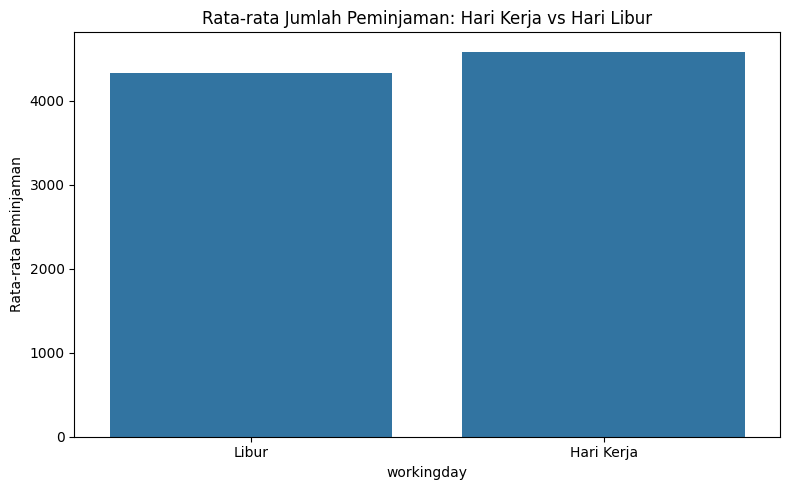

In [10]:
workingday_comparison = day.groupby('workingday')['cnt'].mean()

plt.figure(figsize=(8,5))
sns.barplot(x=workingday_comparison.index, y=workingday_comparison.values)
plt.title('Rata-rata Jumlah Peminjaman: Hari Kerja vs Hari Libur')
plt.xticks([0, 1], ['Libur', 'Hari Kerja'])
plt.ylabel('Rata-rata Peminjaman')
plt.tight_layout()
plt.show()

**Insight:**
- Dari grafik di atas, terlihat bahwa rata-rata jumlah peminjaman sepeda lebih tinggi pada hari kerja dibanding hari libur.
- Hal ini menunjukkan bahwa banyak orang menggunakan sepeda untuk kegiatan rutin seperti pergi ke kantor atau sekolah.
- Sementara itu, saat hari libur, jumlah peminjamnya cenderung lebih sedikit—mungkin karena orang lebih banyak beristirahat di rumah atau bepergian dengan kendaraan lain.

### Korelasi antara Faktor Cuaca dan Jumlah Peminjaman

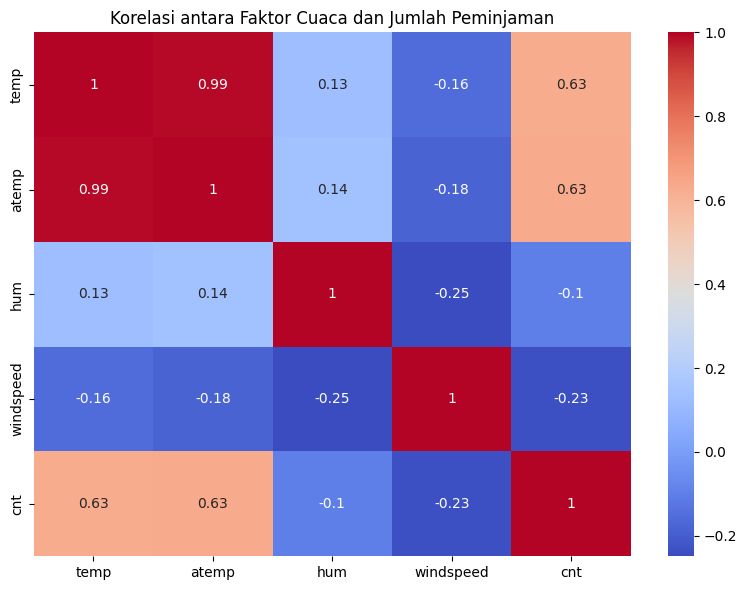

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(day[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antara Faktor Cuaca dan Jumlah Peminjaman')
plt.tight_layout()
plt.show()

**Insight:**
- Dari heatmap korelasi, terlihat bahwa suhu (`temp`) dan suhu yang dirasakan (`atemp`) punya hubungan positif yang bisa diartikan semakin hangat cuacanya, biasanya semakin banyak orang yang meminjam sepeda.
- Kelembapan (`hum`) justru punya hubungan negatif, yang bisa diartikan saat udara terlalu lembap, orang cenderung kurang berminat meminjam sepeda.
- Sementara itu, kecepatan angin (`windspeed`) hampir tidak ada hubungannya sama sekali dengan jumlah peminjaman. Jadi faktor ini tidak terlalu berpengaruh.


### Clustering Manual: Mengelompokkan Hari Berdasarkan Jumlah Peminjaman

Analisis ini bertujuan untuk mengelompokkan hari menjadi tiga kategori berdasarkan jumlah peminjaman: Rendah, Sedang, dan Tinggi. 
Pengelompokan dilakukan dengan teknik **binning** berdasarkan nilai `cnt`.

In [ ]:
# Binning jumlah peminjaman ke dalam 3 kelompok
day['cluster'] = pd.cut(day['cnt'],
                        bins=[0, 3000, 6000, day['cnt'].max()],
                        labels=['Rendah', 'Sedang', 'Tinggi'])

# Lihat distribusi cluster
cluster_counts = day['cluster'].value_counts().sort_index()
print(cluster_counts)

# Visualisasikan jumlah hari dalam tiap kategori
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=day, x='cluster', order=['Rendah', 'Sedang', 'Tinggi'])
plt.title('Distribusi Hari Berdasarkan Kategori Jumlah Peminjaman')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Hari')
plt.tight_layout()
plt.show()

# Analisis tambahan: rata-rata suhu per kategori
avg_temp_by_cluster = day.groupby('cluster')['temp'].mean()
print("\nRata-rata suhu per kategori peminjaman:")
print(avg_temp_by_cluster)

## Conclusion

- **Kesimpulan Pertanyaan 1:** Peminjaman tertinggi terjadi di bulan ke-6 dengan total lebih dari 45000 peminjaman.
- **Kesimpulan Pertanyaan 2:** Musim dengan peminjaman terendah memiliki suhu yang lebih dingin dan angin lebih kencang, memengaruhi keputusan pengguna untuk menyewa sepeda.
- **Analisis Tambahan:** Peminjaman lebih tinggi pada hari kerja, menunjukkan sepeda lebih banyak digunakan untuk keperluan produktif seperti pergi ke tempat kerja.
- **Korelasi Cuaca:** Suhu memiliki pengaruh yang cukup signifikan terhadap jumlah peminjaman dibanding faktor cuaca lainnya.